# Some visualizations of Schneider data


In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("../notebooks/schneider_dose_error.csv")

## Weight vs dose / kg

male: blue

female: orange

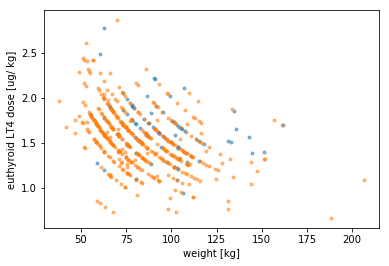

In [4]:
groups = data.groupby('Sex')

for name, group in groups:
    plt.plot(group["Wt.kg"], group["LT4.euthyroid.dose"] / group["Wt.kg"], ".", alpha=0.5)
plt.xlabel("weight [kg]")
plt.ylabel("euthyroid LT4 dose [ug/ kg]")
plt.show()

Let's zoom in a little bit.

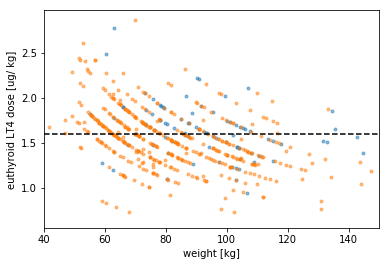

In [5]:
groups = data.groupby('Sex')

for name, group in groups:
    plt.plot(group["Wt.kg"], group["LT4.euthyroid.dose"] / group["Wt.kg"], ".", alpha=0.5)
plt.axhline(1.6, linestyle="--", color="black")
plt.xlabel("weight [kg]")
plt.ylabel("euthyroid LT4 dose [ug/ kg]")

plt.xlim(40, 150)
plt.show()

There's a clear trend here: a higher weight requires a smaller dose per kg.

What if we just plot the dose itself (without normalizing per kg)?

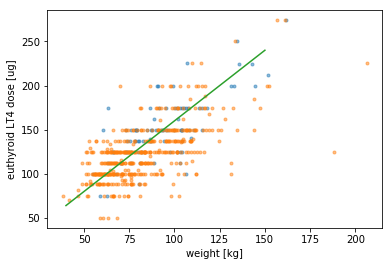

In [6]:
groups = data.groupby('Sex')

for name, group in groups:
    plt.plot(group["Wt.kg"], group["LT4.euthyroid.dose"], ".", alpha=0.5)

x = np.linspace(40, 150)
y = 1.6 * x
plt.plot(x, y)
plt.xlabel("weight [kg]")
plt.ylabel("euthyroid LT4 dose [ug]")
plt.show()

The trend does look pretty linear: the 1.6 ug/kg line (green) is decent but underpredicts dose for low weight patients.

## BMI vs dose

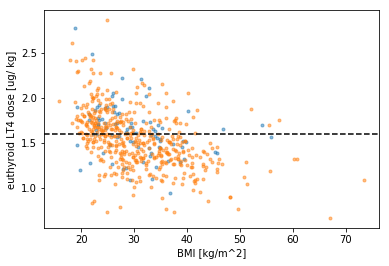

In [7]:
groups = data.groupby('Sex')

for name, group in groups:
    plt.plot(group["BMI"], group["LT4.euthyroid.dose"] / group["Wt.kg"], ".", alpha=0.5)
plt.axhline(1.6, linestyle="--", color="black")
plt.xlabel("BMI [kg/m^2]")
plt.ylabel("euthyroid LT4 dose [ug/ kg]")
plt.show()

Let's zoom in again.

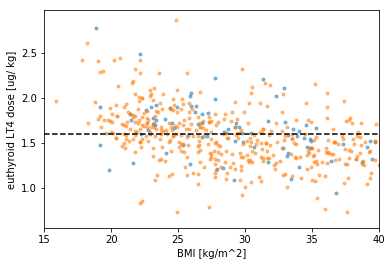

In [8]:
groups = data.groupby('Sex')

for name, group in groups:
    plt.plot(group["BMI"], group["LT4.euthyroid.dose"] / group["Wt.kg"], ".", alpha=0.5)
plt.axhline(1.6, linestyle="--", color="black")
plt.xlabel("BMI [kg/m^2]")
plt.ylabel("euthyroid LT4 dose [ug/ kg]")
plt.xlim(15, 40)
plt.show()

Same result: 1.6 ug/kg underpredicts dose for patients that are underweight or normal, is about right for overweight patients and over-predicts for obese patients.

Also, it might just be be but it looks like the blue dots (male patients) tend to need higher doses than the female patients on average for BMI < 30.

## Dose vs Age

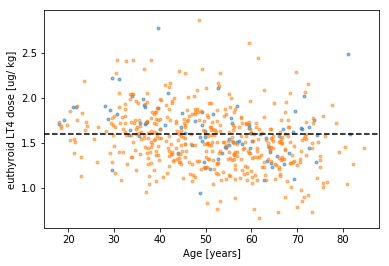

In [9]:
groups = data.groupby('Sex')

for name, group in groups:
    plt.plot(group["Age"], group["LT4.euthyroid.dose"] / group["Wt.kg"], ".", alpha=0.5)
plt.axhline(1.6, linestyle="--", color="black")

plt.xlabel("Age [years]")
plt.ylabel("euthyroid LT4 dose [ug/ kg]")
plt.show()

## Dose vs Height

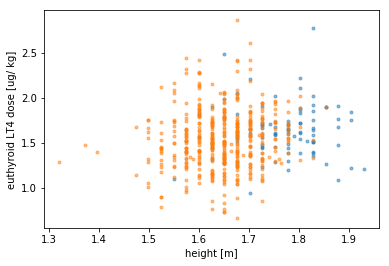

In [10]:
groups = data.groupby('Sex')

for name, group in groups:
    plt.plot(group["Ht.m"], group["LT4.euthyroid.dose"] / group["Wt.kg"], ".", alpha=0.5)
plt.xlabel("height [m]")
plt.ylabel("euthyroid LT4 dose [ug/ kg]")
plt.show()

## Thyrosim vs Schneider data

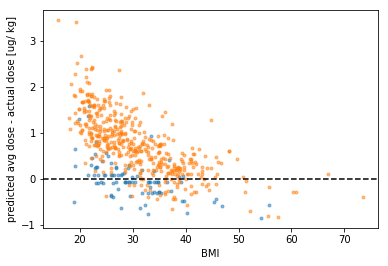

In [11]:
groups = data.groupby('Sex')

for name, group in groups:
    plt.plot(group["BMI"], (group["avg_predicted_dose"] - group["LT4.euthyroid.dose"]) / group["Wt.kg"], ".", alpha=0.5)
plt.axhline(0, linestyle="--", color="black")

plt.xlabel("BMI")
plt.ylabel("predicted avg dose - actual dose [ug/ kg]")
plt.show()

I think it's clear that our current model isn't working correctly. We are overpredicting doses for BMI < 30 and underpredicting above 40. Also, we clearly are underpredicting doses for males and overpredicting for females.

For comparison, let's look at the equivalent plot for 1.6 ug / kg predicted dose.

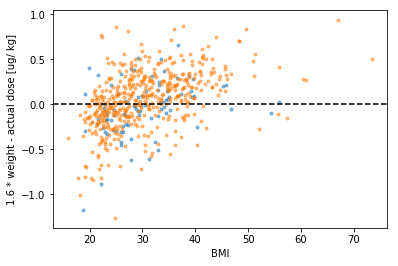

In [12]:
groups = data.groupby('Sex')

for name, group in groups:
    plt.plot(group["BMI"], (group["Wt.kg"] * 1.6 - group["LT4.euthyroid.dose"]) / group["Wt.kg"], ".", alpha=0.5)
plt.axhline(0, linestyle="--", color="black")
plt.xlabel("BMI")
plt.ylabel("1.6 * weight - actual dose [ug/ kg]")
plt.show()

It looks like the normal method is better than us at the moment, although it definitely underpredicts for low and overpredicts for high BMIs.

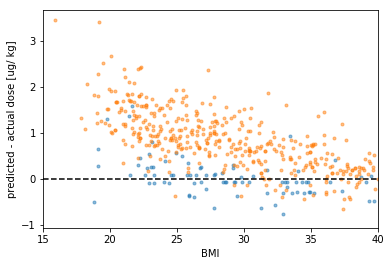

In [13]:
groups = data.groupby('Sex')

for name, group in groups:
    plt.plot(group["BMI"], (group["avg_predicted_dose"] - group["LT4.euthyroid.dose"]) / group["Wt.kg"], ".", alpha=0.5)
plt.xlabel("BMI")
plt.ylabel("predicted - actual dose [ug/ kg]")
plt.axhline(0, linestyle="--", color="black")
plt.xlim(15, 40)
plt.show()

Here it looks like out largest errors come from underweight patients.

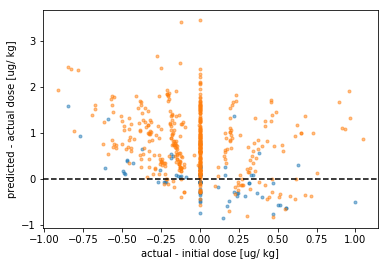

In [14]:
groups = data.groupby('Sex')

for name, group in groups:
    plt.plot((group["LT4.euthyroid.dose"] - group["LT4.initial.dose"])  / group["Wt.kg"], (group["avg_predicted_dose"] - group["LT4.euthyroid.dose"]) / group["Wt.kg"], ".", alpha=0.5)
plt.xlabel("actual - initial dose [ug/ kg]")
plt.ylabel("predicted - actual dose [ug/ kg]")
plt.axhline(0, linestyle="--", color="black")
plt.show()

It looks like we tend to make errors in the opposite direction when patients are under vs over-dosed.

In [6]:
data

,Surgeon,Race,Sex,Age,Wt.lb,Wt.kg,Ht.in,Ht.m,BMI,LT4.initial.dose,...,Path.Graves,Path.Hashi/Thyroiditis,Path.Adenoma,Micro.PTC,Path.Hurthle.cell,patient_ID,max_predicted_dose,avg_predicted_dose,min_predicted_dose,error_contribution
0,3,1,0,60.1,254,115.2,71.5,1.8161,34.927939,175.00,...,0,0,0,0.0,0,1,162.5,106.25,50.0,0.062215
1,1,1,1,65.0,170,77.1,68.0,1.7272,25.844559,125.00,...,0,0,0,0.0,0,2,200.0,125.00,50.0,6.571652
2,2,1,1,61.4,113,51.3,62.0,1.5748,20.685525,100.00,...,1,0,0,0.0,0,3,225.0,143.75,62.5,4.322891
3,1,1,1,66.4,103,46.7,61.0,1.5494,19.453143,88.00,...,0,1,0,0.0,0,4,225.0,143.75,62.5,1.448971
4,2,1,0,64.4,224,101.6,68.0,1.7272,34.057162,175.00,...,0,0,1,0.0,0,5,175.0,112.50,50.0,0.013477
5,1,1,1,63.2,227,103.0,62.0,1.5748,41.532341,150.00,...,0,0,0,0.0,0,7,200.0,131.25,62.5,0.435665
6,1,1,1,59.0,167,75.7,64.0,1.6256,28.646298,112.00,...,0,0,0,0.0,0,9,200.0,131.25,62.5,0.928633
7,1,1,1,50.3,203,92.1,65.0,1.6510,33.788233,137.00,...,0,1,0,0.0,0,14,200.0,125.00,50.0,0.000000
8,2,1,0,69.1,204,92.5,71.0,1.8034,28.441834,175.00,...,0,0,0,0.0,0,16,162.5,106.25,50.0,0.000000
9,1,1,1,56.8,164,74.4,66.0,1.6764,26.473882,125.00,...,0,0,0,0.0,0,18,200.0,131.25,62.5,0.736454
